In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/eshabanaiyar/Downloads/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


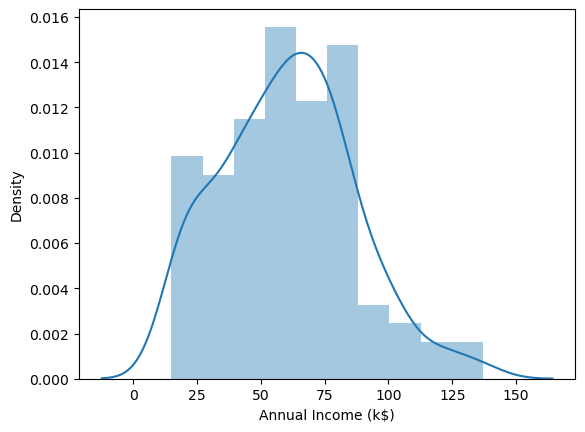

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

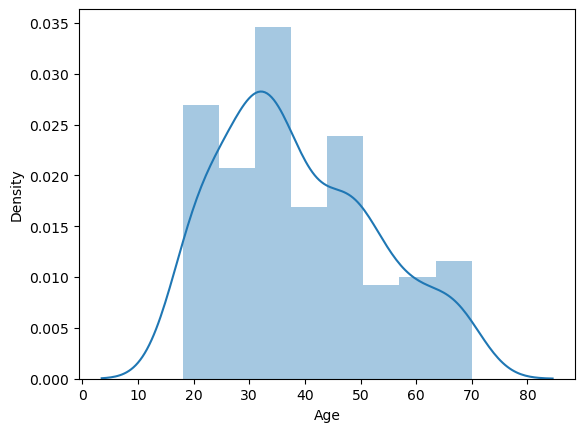

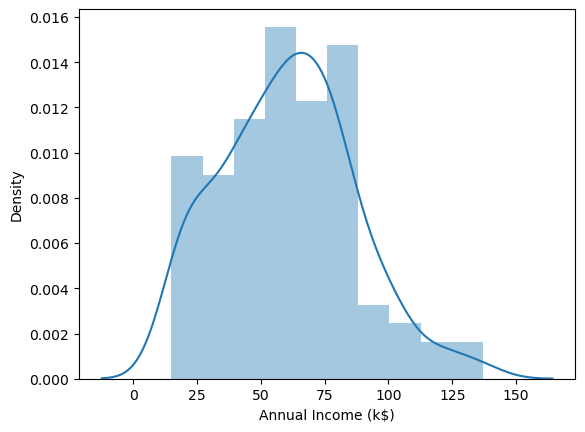

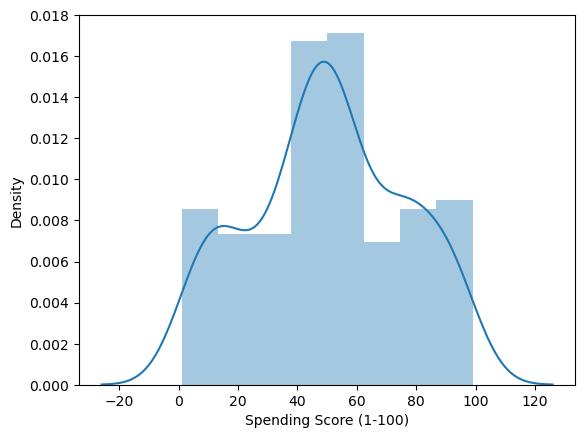

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i]);

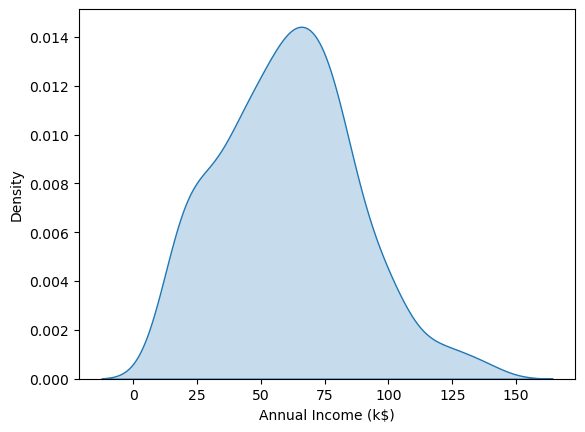

In [9]:
sns.kdeplot(df['Annual Income (k$)'],shade=True);

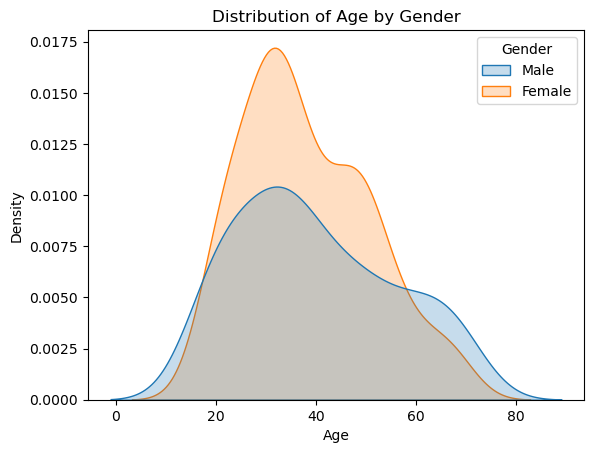

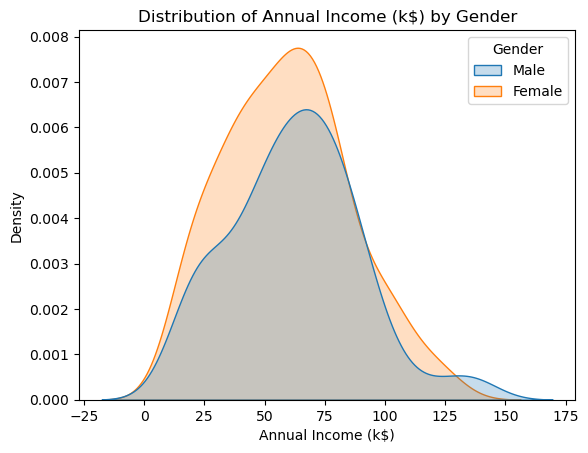

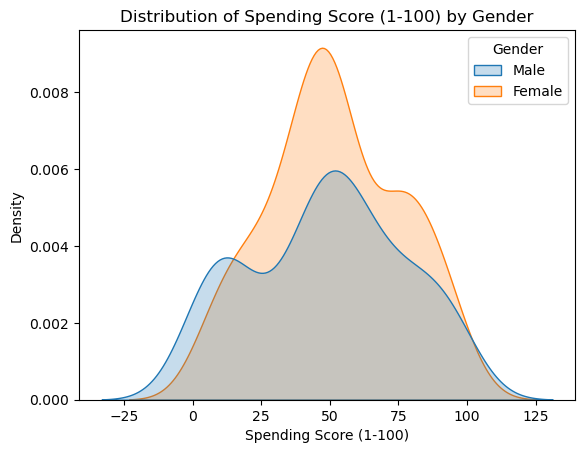

In [10]:

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True)
    plt.title(f'Distribution of {i} by Gender')
    plt.show()
 


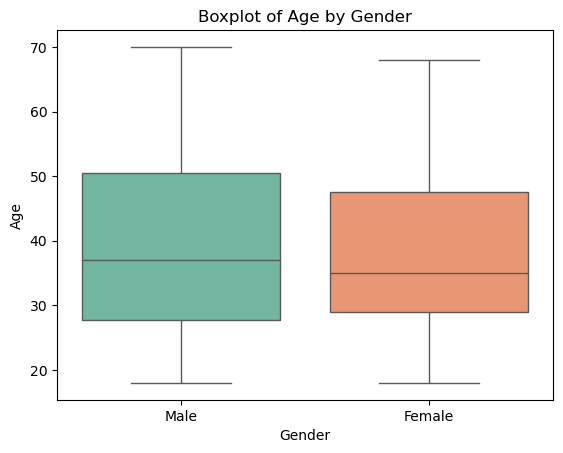

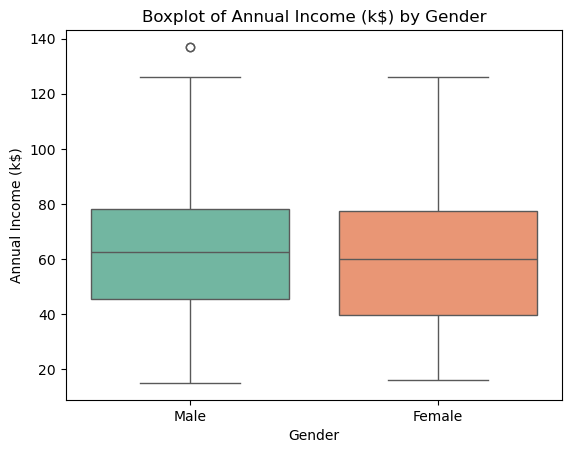

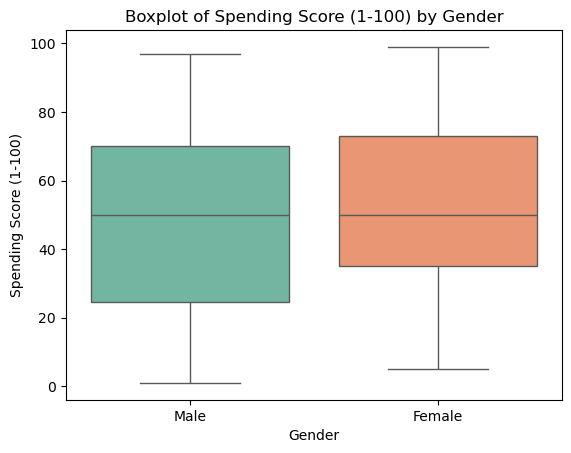

In [11]:


columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x='Gender', y=i, palette="Set2")
    plt.title(f'Boxplot of {i} by Gender')
    plt.show()


In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

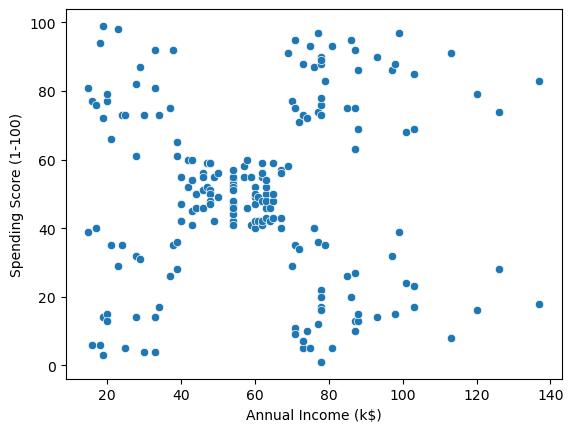

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)',y= 'Spending Score (1-100)')


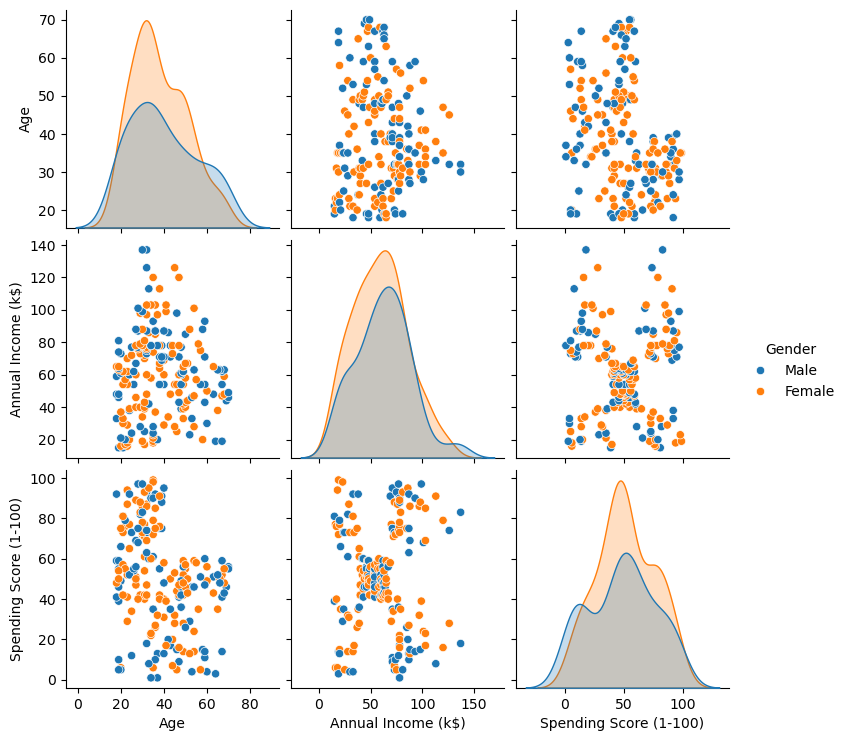

In [15]:
df=df.drop('CustomerID' , axis=1)
sns.pairplot(df,hue='Gender')
plt.savefig('bivariate_analysis.png')


In [16]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

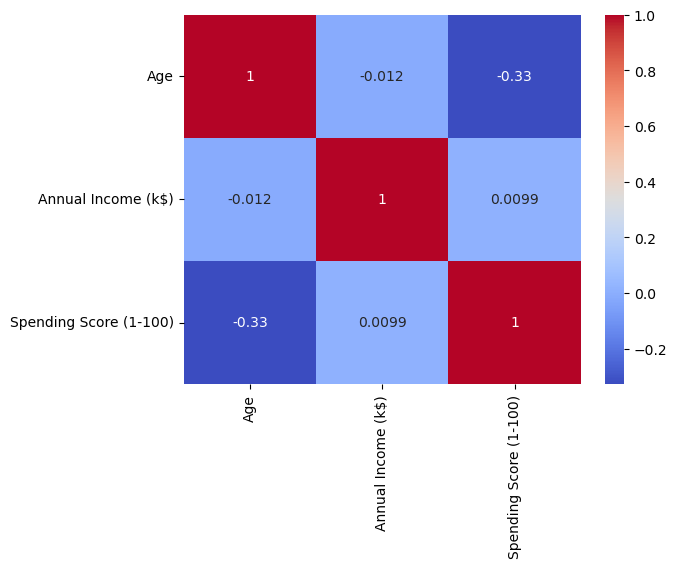

In [18]:
sns.heatmap(df.corr(numeric_only=True),annot= True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [20]:
clustering1 = KMeans(n_clusters=6)

In [21]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [22]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [23]:
df['Income Cluster']=clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [24]:
df['Income Cluster'].value_counts()

Income Cluster
0    52
1    48
5    40
3    38
2    16
4     6
Name: count, dtype: int64

In [25]:
clustering1.inertia_

5795.492712550607

In [26]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [27]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 25341.28587186322,
 14647.632635731707,
 8667.679614837509,
 5430.245925925927,
 3972.3214285714294,
 3577.0701140964306,
 2168.4787157287155,
 1766.6142857142859]

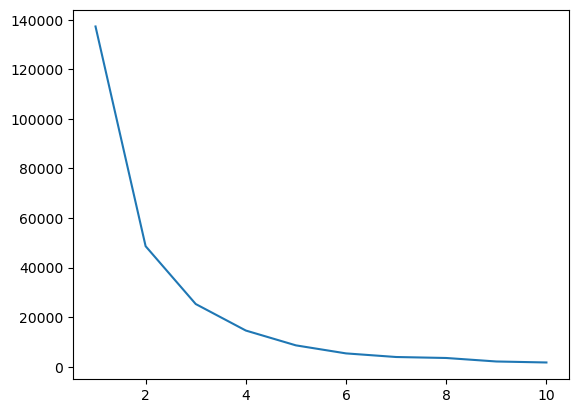

In [28]:
plt.plot(range(1,11),inertia_scores)

In [29]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.365385,78.692308,49.423077
1,44.000000,46.291667,50.770833
2,37.812500,100.875000,52.875000
3,35.000000,23.789474,49.210526
4,36.833333,127.666667,49.666667
5,40.275000,62.850000,50.475000


In [30]:
#Bivariate Clustering

In [31]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()



,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,3,4
1,Male,21,15,81,3,3
2,Female,20,16,6,3,4
3,Female,23,16,77,3,3
4,Female,31,17,40,3,4


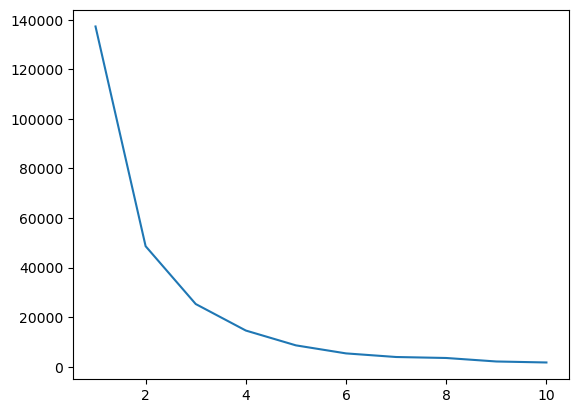

In [32]:


inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores)

In [33]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

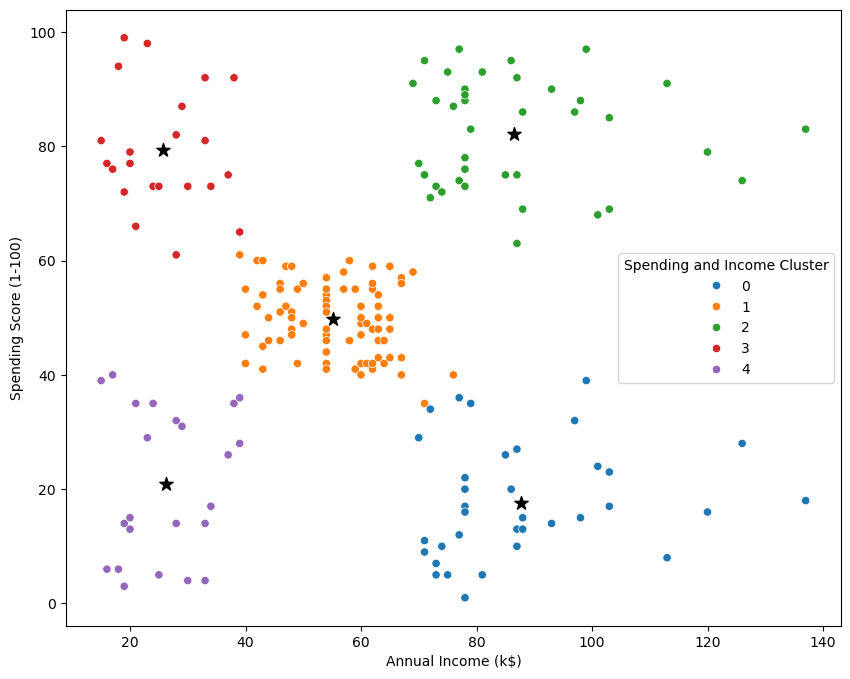

In [34]:
plt.figure(figsize= (10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10' )

In [35]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.472222,0.527778
1,0.587500,0.412500
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [36]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,40.666667,87.750000,17.583333
1,42.937500,55.087500,49.712500
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [37]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [38]:
scale=StandardScaler()

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,3,4
1,Male,21,15,81,3,3
2,Female,20,16,6,3,4
3,Female,23,16,77,3,3
4,Female,31,17,40,3,4


In [40]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,3,4,True
1,21,15,81,3,3,True
2,20,16,6,3,4,False
3,23,16,77,3,3,False
4,31,17,40,3,4,False


In [41]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [42]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [43]:
dff = scale.fit_transform(dff)

In [44]:
dff = pd.DataFrame(scale.fit_transform(dff))

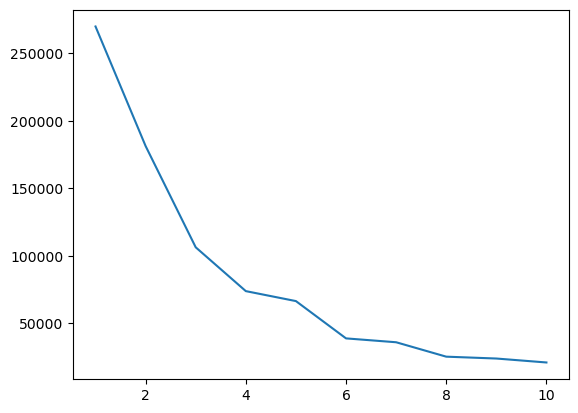

In [45]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [46]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,3,4
1,Male,21,15,81,3,3
2,Female,20,16,6,3,4
3,Female,23,16,77,3,3
4,Female,31,17,40,3,4
...,...,...,...,...,...,...
195,Female,35,120,79,4,2
196,Female,45,126,28,4,0
197,Male,32,126,74,4,2
198,Male,32,137,18,4,0


In [47]:
df.to_csv('Clustering_csv')